# Two Traveling Salespeople

## Two-person Version of the [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the two tours which collectively visit each of $n$ cities exactly once and return back to the same starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$.

* __State space:__ Each state represents a pair of tours, where the first element of the pair are the cities to visit for the first person and the second element are the cities to visit for the second person. The cities are numbered and the tours can be expressed a pair of vectors $(\pi_1, \pi_2)$ with the order in which the cities are visited. That is, $\pi_i(1)$ is the index of the first city to visit by the $i$th person ($i$ either is 1 or 2), $\pi_i(2)$ the index of the second city to visit by the $i$th person, and so on.

* __Objective function:__ Minimize the maximum tour length for both people. Informally, the cities should be divided up roughly evenly between the two people so that neither one has a tour that is too long.

The optimization problem is to find the optimal pair of tours $\pi_1^*$ and $\pi_2^*$ through the $n$ cities and which return to the start cities of each tour:

  > minimize: $\max(\mathrm{tourlength}(\pi_1), \mathrm{tourlength}(\pi_2))$
  where $\mathrm{tourlength}(\pi_i) = d_{\pi_i(n),\pi_i(1)} + \sum_{j = 1}^{n-1} d_{\pi_i(j),\pi_i(j+1)}$
  >
  > subject to: every city must be visited exactly once


## Helper functions

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

np.set_printoptions(precision=2)

np.random.seed(0) # make the results repeatable

In [80]:
def random_tour_pair(n):
    """Create two random tours with n cities"""

    tour = list(range(n))
    np.random.shuffle(tour)

    split_index = np.random.randint(1, n-1)
    tour1 = tour[:split_index]
    tour2 = tour[split_index:]

    return tour1, tour2

random_tour_pair(10)

([2, 8, 4, 9, 1], [6, 7, 3, 0, 5])

In [81]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calculates a
    pairwise Euclidean distance matrix.
    """

    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })

    dist = squareform(pdist(pos))

    return({"pos": pos, "dist": dist})

tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
          x         y
0  0.297535  0.368242
1  0.056713  0.957155
2  0.272656  0.140351
3  0.477665  0.870087
4  0.812169  0.473608
5  0.479977  0.800911
6  0.392785  0.520477
7  0.836079  0.678880
8  0.337396  0.720633
9  0.648172  0.582020
Distance matrix:
          0         1         2         3         4         5         6  \
0  0.000000  0.636250  0.229245  0.533194  0.525310  0.469561  0.179578   
1  0.636250  0.000000  0.844867  0.429862  0.896957  0.451182  0.551028   
2  0.229245  0.844867  0.000000  0.757987  0.634140  0.692330  0.398657   
3  0.533194  0.429862  0.757987  0.000000  0.518737  0.069215  0.359766   
4  0.525310  0.896957  0.634140  0.518737  0.000000  0.466346  0.421995   
5  0.469561  0.451182  0.692330  0.069215  0.466346  0.000000  0.293676   
6  0.179578  0.551028  0.398657  0.359766  0.421995  0.293676  0.000000   
7  0.621712  0.827556  0.779396  0.406227  0.206659  0.376431  0.470745   
8  0.354638  0.367050  0.583882  0.204968  0.535192  0.

In [82]:
def tour_pair_max_length(tsp, tour_pair):
   """Calculate the maximum length of a pair of tours, i.e., the objective function."""

   tour0_len = tour_length(tsp, tour_pair[0])
   tour1_len = tour_length(tsp, tour_pair[1])

   return max(tour0_len, tour1_len)

def tour_length(tsp, tour):
    """Calculate the length of a single tour"""

    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()

    tl = 0
    dist = tsp["dist"]

    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]

    tl += dist[tour[-1], tour[0]]

    return(tl)

np.random.seed(0) # make the results repeatable
tour_pair = random_tour_pair(10)
print(f"objective value: {tour_pair_max_length(tsp, tour_pair)}")

objective value: 2.8609251884702456


Tour length (red): 2.86
Tour length (blue): 2.17


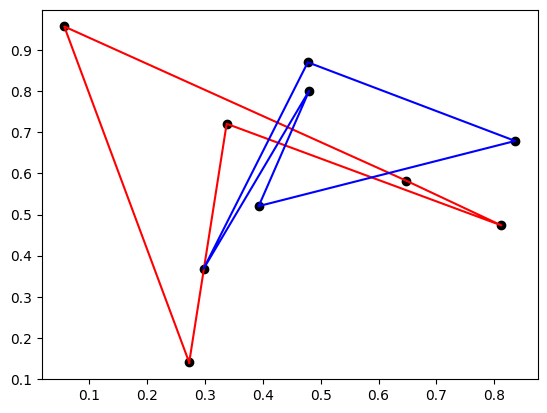

In [83]:
def show_2tsp(tsp, tour_pair = None, ax = None):
    """display the twoperson traveling salesman problem and a tour pair."""

    pos = tsp["pos"]

    plt.scatter(pos["x"], pos["y"], color='black')

    if tour_pair is not None:
      colors = ['red', 'blue']

      for tour, color in zip(tour_pair, colors):
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()

        print(f"Tour length ({color}): {round(tour_length(tsp, tour), 2)}")
        tour_x_list = [pos.loc[i, 'x'] for i in tour]
        tour_y_list = [pos.loc[i, 'y'] for i in tour]

        # wrap back to start
        tour_x_list.append(tour_x_list[0])
        tour_y_list.append(tour_y_list[0])

        if ax != None:
          ax.plot(tour_x_list, tour_y_list, color)
        else:
          plt.plot(tour_x_list, tour_y_list, color)

    plt.show()

show_2tsp(tsp, tour_pair)

## Steepest-ascent Hill Climbing Search [2 Points]

Come up with reasonable definition for local moves and explain it in text. Implement a steepest-ascent hill climbing strategy. Measure and report the performance of this on 50 random problem instances. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [84]:
# Local move: Reverse the order of any sequence of cities in either tour or move a city from one tour to the end of the other tour

def successor_states(tsp, tour_pair):
  """Returns successor states of a tour pair."""

  # initialize list to store successor states
  states = []

  # iterate over the two tours
  for n in range(2):

    # iterate over possible starting positions
    for i in range(len(tour_pair[n])):

      # iterate over possible ending positions
      for j in range(i + 2, len(tour_pair[n])):

        # make a copy of the tour pair
        copy = (tour_pair[0].copy(), tour_pair[1].copy())

        # reverse the cities from i to j (exclusive) for tour n
        copy[n][i:j] = copy[n][i:j][::-1]

        # append copy to successor state list
        states.append(copy)

  # iterate over the two tours
  for n in range(2):

    # if length of tour is less than 2, do not remove a city from it
    if len(tour_pair[n]) < 2:
      continue

    # iterate over possible cities to move to other tour
    for i in range(len(tour_pair[n])):

      # make a copy of the tour pair
      copy = (tour_pair[0].copy(), tour_pair[1].copy())

      # remove city from position i in tour n
      city = copy[n].pop(i)

      # append to other tour
      if n == 0:
        copy[1].append(city)
      else:
        copy[0].append(city)

      # append copy to successor state list
      states.append(copy)

  # return successor state list
  return states

def steepest_ascent_hill_climbing(tsp, tour_pair):
  """Returns a state that is a local maximum, as well as the number of local moves, in a tuple."""

  # initialize variables
  current = tour_pair
  num_moves = 0

  # loop until local maximum is found
  while True:

    # find highest value successor state (objective function is negated)
    neighbor = max(successor_states(tsp, current), key=lambda x: -tour_pair_max_length(tsp, x))

    # if no improvement can be made, return current state and number of local moves
    if -tour_pair_max_length(tsp, neighbor) <= -tour_pair_max_length(tsp, current):
      return (current, num_moves)

    # update variables
    current = neighbor
    num_moves += 1

def simulate(alg, n, verbose=True, **kwargs):
  """Runs alg on 50 randomized problem instances with n cities, using a seed of 0, and prints performance measures."""

  # set seed and initialize variables
  np.random.seed(0)
  obj_fun = 0
  loc_mov = 0

  # loop 50 times
  for i in range(1, 51):

    # generate random problem instance
    tsp = random_tsp(n)
    tour_pair = random_tour_pair(n)

    # run hill climbing algorithm
    maximum, num_moves = alg(tsp, tour_pair, **kwargs)

    # calculate objective function
    max_length = tour_pair_max_length(tsp, maximum)

    # add to objective function and local moves sum
    obj_fun += max_length
    loc_mov += num_moves

    # report performance of problem instance
    if verbose:
      print(f"Instance {i}: {maximum}\t\tObjective Function: {max_length}\t\tLocal Moves: {num_moves}")

  # report average performance
  print(f"\nAverage Objective Function: {obj_fun/50}\tAverage Local Moves: {loc_mov/50}")

simulate(steepest_ascent_hill_climbing, 10)

Instance 1: ([9, 7, 8, 3, 0], [4, 6, 5, 1, 2])		Objective Function: 1.3659939298814452		Local Moves: 6
Instance 2: ([7, 8, 9, 1, 0], [4, 5, 3, 6, 2])		Objective Function: 2.177959350073916		Local Moves: 1
Instance 3: ([2, 3, 6, 8, 9, 1], [0, 4, 7, 5])		Objective Function: 2.1382291816848626		Local Moves: 5
Instance 4: ([4, 5, 3, 7], [6, 9, 2, 0, 1, 8])		Objective Function: 1.7402192266188423		Local Moves: 6
Instance 5: ([7, 2, 0, 4, 1], [8, 3, 5, 6, 9])		Objective Function: 1.6255517276855578		Local Moves: 6
Instance 6: ([0, 9, 6, 7, 1], [5, 8, 4, 3, 2])		Objective Function: 1.9824172524134136		Local Moves: 2
Instance 7: ([0, 7, 8, 3, 5, 6], [2, 4, 9, 1])		Objective Function: 2.3876027793740087		Local Moves: 7
Instance 8: ([8, 7, 9, 4], [6, 3, 1, 0, 2, 5])		Objective Function: 2.094828180196811		Local Moves: 3
Instance 9: ([7, 1, 0, 5, 8], [6, 9, 4, 2, 3])		Objective Function: 2.5006933508494944		Local Moves: 2
Instance 10: ([5, 8, 4, 9, 6, 1], [3, 0, 2, 7])		Objective Function: 2.2574

## Steepest-ascent Hill Climbing Search with Random Restarts [1 Point]

Modify the code to include random restarts once improvement is no longer possible. For a fixed problem instance, analyze the improvement in the objective function as more restarts are done. Plot the number of restarts on the x axis and the objective function on the y axis.

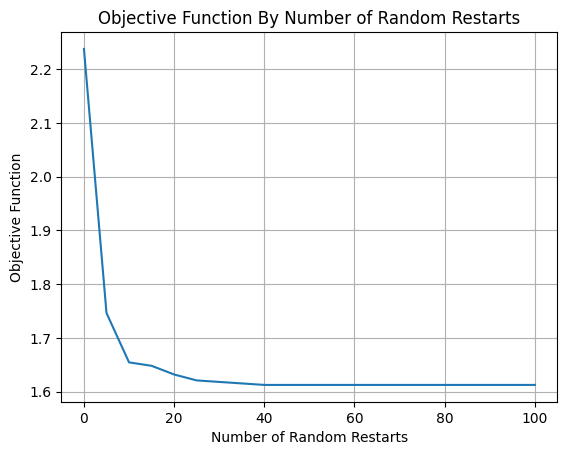

In [85]:
# The objective function decreases exponentially when the number of random restarts increases.
# The objective function converges to a single value as the number of random restarts approaches infinity.

def steepest_ascent_hill_climbing_rr(tsp, tour_pair, num_restarts):
  """After num_restarts random restarts, returns the best state that is a local maximum."""

  # keep track of best state
  best = tour_pair

  # loop once for given tour pair and loop an additional num_restarts times for random restarts
  for i in range(num_restarts + 1):

    # initialize current
    current = tour_pair

    # loop until local maximum is found
    while True:

      # find highest value successor state (objective function is negated)
      neighbor = max(successor_states(tsp, current), key=lambda x: -tour_pair_max_length(tsp, x))

      # if no improvement can be made, update best state if needed and randomly generate new initial state
      if -tour_pair_max_length(tsp, neighbor) <= -tour_pair_max_length(tsp, current):
        best = max(best, current, key=lambda x: -tour_pair_max_length(tsp, x))
        tour_pair = random_tour_pair(len(tour_pair[0]) + len(tour_pair[1]))
        break

      # update current
      current = neighbor

  # return best state
  return best

# generate random, fixed problem instance
tsp = random_tsp(10)
tour_pair = random_tour_pair(10)

# initialize objective function list
obj_fun_val = []

# loop with increasingly larger number of random restarts
for i in range(0, 101, 5):

  # initialize objective function sum
  obj_fun = 0

  # loop 50 times
  for j in range(50):

    # run hill climbing algorithm
    maximum = steepest_ascent_hill_climbing_rr(tsp, tour_pair, i)

    # calculate objective function
    max_length = tour_pair_max_length(tsp, maximum)

    # add to objective function sum
    obj_fun += max_length

  # append average objective function to list
  obj_fun_val.append(obj_fun/50)

# plot objective function by number of random restarts
plt.plot(range(0, 101, 5), obj_fun_val)
plt.title("Objective Function By Number of Random Restarts")
plt.xlabel("Number of Random Restarts")
plt.ylabel("Objective Function")
plt.grid("on")
plt.show()

## Stochastic Hill Climbing [1 Point]

Implement an approach that chooses randomly from among all uphill moves. Measure and report the performance of this on the same 50 random problem instances as was done earlier. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [86]:
import random

def stochastic_hill_climbing(tsp, tour_pair):
  """Returns a state that is a local maximum, as well as the number of local moves, in a tuple."""

  # initialize variables
  current = tour_pair
  num_moves = 0

  # loop until local maximum is found
  while True:

    # calculate objective function for current (objective function is negated)
    current_val = -tour_pair_max_length(tsp, current)

    # filter out uphill successor states
    uphill = list(filter(lambda x: -tour_pair_max_length(tsp, x) > current_val, successor_states(tsp, current)))

    # if no improvement can be made (no uphill moves), return current state and number of local moves
    if len(uphill) == 0:
      return (current, num_moves)

    # randomly choose an uphill successor state
    neighbor = random.choice(uphill)

    # update variables
    current = neighbor
    num_moves += 1

simulate(stochastic_hill_climbing, 10)

Instance 1: ([7, 1, 6, 4, 3], [9, 0, 8, 5, 2])		Objective Function: 2.214683337678152		Local Moves: 12
Instance 2: ([9, 8, 7, 1, 4, 5], [6, 3, 0, 2])		Objective Function: 2.3335654925394773		Local Moves: 4
Instance 3: ([3, 6, 4, 8, 9], [0, 2, 1, 7, 5])		Objective Function: 2.107746163464702		Local Moves: 9
Instance 4: ([4, 2, 8, 3], [5, 0, 7, 9, 6, 1])		Objective Function: 2.482717050508884		Local Moves: 5
Instance 5: ([4, 3, 1, 7], [0, 9, 6, 5, 8, 2])		Objective Function: 1.6192947818674919		Local Moves: 13
Instance 6: ([0, 9, 7, 6, 4], [1, 5, 8, 3, 2])		Objective Function: 2.1859845709129386		Local Moves: 5
Instance 7: ([2, 5, 1, 8, 7], [6, 0, 9, 3, 4])		Objective Function: 2.5502455561172086		Local Moves: 13
Instance 8: ([8, 7, 1, 9, 5], [6, 0, 3, 4, 2])		Objective Function: 2.046425200139587		Local Moves: 5
Instance 9: ([1, 8, 7, 3], [6, 9, 4, 5, 2, 0])		Objective Function: 2.410855865059982		Local Moves: 9
Instance 10: ([6, 9, 4, 5, 7, 1], [3, 2, 0, 8])		Objective Function: 2.3355

## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state. Implement this and report the performance of on 50 the same random problem instances. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [87]:
def random_successor_state(tour_pair, us_states=False):
  """Returns a randomly generated successor state of a tour pair."""

  # make a copy of the tour pair
  copy = (tour_pair[0].copy(), tour_pair[1].copy())

  # create random number generator
  rng = np.random.default_rng()

  # randomly choose between reversing the order of a sequence of cities or moving a city
  move = rng.integers(2)

  # if US states problem and reversing the order of a sequence of cities has been chosen, check if this move is possible for both tours
  if us_states and move == 0:

    # if length of first tour is less than 3, the reversing local move can only be applied to the second tour
    if len(copy[0]) < 3:
      tour = 1
    # if length of second tour is less than 3, the reversing local move can only be applied to the first tour
    elif len(copy[1]) < 3:
      tour = 0
    # else, randomly choose one of the tours
    else:
      tour = rng.integers(2)

  # else, check if local moves are possible for both tours
  else:

    # if length of first tour is less than 2, local moves can only be applied to the second tour
    if len(copy[0]) < 2:
      tour = 1
    # if length of second tour is less than 2, local moves can only be applied to the first tour
    elif len(copy[1]) < 2:
      tour = 0
    # else, randomly choose one of the tours
    else:
      tour = rng.integers(2)

  # if move is 0, reverse the order of a sequence of cities
  if move == 0:

    # if US states problem, randomly choose a starting index other than the first index
    if us_states:
      start = rng.integers(1, len(copy[tour]) - 1)
    # else, randomly choose a starting index
    else:
      start = rng.integers(len(copy[tour]) - 1)

    # randomly choose an ending index
    end = rng.integers(start + 2, len(copy[tour]) + 1)

    # reverse the cities from start to end (exclusive) for the chosen tour
    copy[tour][start:end] = copy[tour][start:end][::-1]

  # else, move a city
  else:

    # if US states problem, randomly choose an index other than the first index
    if us_states:
      ind = rng.integers(1, len(copy[tour]))
    # else, randomly choose an index
    else:
      ind = rng.integers(len(copy[tour]))

    # remove city from position ind in chosen tour
    city = copy[tour].pop(ind)

    # append to other tour
    copy[(tour+1)%2].append(city)

  # return successor state
  return copy

def first_choice_hill_climbing(tsp, tour_pair):
  """Returns a state that is a local maximum, as well as the number of local moves, in a tuple."""

  # initialize variables
  current = tour_pair
  num_moves = 0

  # loop until local maximum is found
  while True:

    # calculate objective function for current (objective function is negated)
    current_val = -tour_pair_max_length(tsp, current)

    # generate random successor state
    neighbor = random_successor_state(current)

    # initialize counter variable for number of generated successor states
    generated = 1

    # loop until neighbor is a higher value state than current
    while -tour_pair_max_length(tsp, neighbor) <= current_val:

      # if no improvement can be made after 100 generated states, return current state and number of local moves
      if generated == 100:
        return (current, num_moves)

      # generate another random succesor state
      neighbor = random_successor_state(current)

      # increase counter
      generated += 1

    # update variables
    current = neighbor
    num_moves += 1

simulate(first_choice_hill_climbing, 10)

Instance 1: ([7, 3, 8, 1, 2, 0], [6, 5, 9, 4])		Objective Function: 1.8971737529192656		Local Moves: 7
Instance 2: ([7, 8, 9, 1, 0], [4, 5, 3, 6, 2])		Objective Function: 2.177959350073916		Local Moves: 2
Instance 3: ([4, 6, 8, 1, 2], [7, 0, 9, 3, 5])		Objective Function: 2.252946575322085		Local Moves: 7
Instance 4: ([4, 7, 1, 9, 3], [5, 0, 2, 6, 8])		Objective Function: 2.2640995696511164		Local Moves: 8
Instance 5: ([9, 8, 3, 2, 6], [5, 0, 4, 7, 1])		Objective Function: 1.6407068784414878		Local Moves: 9
Instance 6: ([0, 9, 6, 7, 5, 2], [4, 8, 3, 1])		Objective Function: 2.145321604328506		Local Moves: 4
Instance 7: ([7, 1, 9, 8], [2, 0, 6, 5, 4, 3])		Objective Function: 2.1138039997313447		Local Moves: 11
Instance 8: ([8, 7, 9, 5], [6, 3, 4, 2, 0, 1])		Objective Function: 2.037311484041125		Local Moves: 6
Instance 9: ([7, 8, 1, 3], [0, 4, 9, 6, 5, 2])		Objective Function: 2.410855865059982		Local Moves: 8
Instance 10: ([9, 6, 7, 2, 1], [0, 4, 3, 5, 8])		Objective Function: 1.733659

## Simulated Annealing [1 Point]

Implement an algorithm that uses simulated annealing to solve the problem, as described in the lectures and book (Section 4.1.2). Experiment with hyperparameters like the temperature schedule and thresholds until you find values that work well.

In [88]:
def fast_simulated_annealing_schedule(time):
  """Returns temperature at a given time."""

  # return temperature at given time
  return 100 / (1 + time)

def simulated_annealing(tsp, tour_pair, schedule, threshold, us_states=False):
  """Returns a state that is a local maximum, as well as the number of local moves, in a tuple."""

  # initialize variables
  current = tour_pair
  num_moves = 0
  time = 1

  # loop until threshold is reached
  while True:

    # find temperature at current time
    temp = schedule(time)

    # if temperature is below threshold, return current state and number of local moves
    if temp < threshold:
      return (current, num_moves)

    # generate random successor state
    next = random_successor_state(current, us_states=us_states)

    # calculate difference between objective function of current and next
    diff = tour_pair_max_length(tsp, current) - tour_pair_max_length(tsp, next)

    # if next is better than current or if next is worse than current with the calculated probability
    if diff > 0 or random.random() < math.exp(diff/temp):

      # update variables
      current = next
      num_moves += 1

    # increment time
    time += 1

simulate(simulated_annealing, 10, schedule=fast_simulated_annealing_schedule, threshold=0.01)

Instance 1: ([4, 2, 1, 5, 6], [3, 7, 8, 9, 0])		Objective Function: 1.3659939298814452		Local Moves: 2729
Instance 2: ([2, 4, 7, 0, 1], [8, 6, 9, 5, 3])		Objective Function: 1.6049808865268365		Local Moves: 2641
Instance 3: ([2, 7, 1, 9, 3, 5], [8, 6, 4, 0])		Objective Function: 1.787238943591735		Local Moves: 4317
Instance 4: ([9, 2, 6, 0, 7, 1], [8, 3, 5, 4])		Objective Function: 1.747649823730383		Local Moves: 2587
Instance 5: ([9, 6, 1, 7, 4], [5, 2, 0, 8, 3])		Objective Function: 1.3401625620601214		Local Moves: 2103
Instance 6: ([0, 1, 9, 7, 5, 2], [3, 4, 8, 6])		Objective Function: 1.650017980620547		Local Moves: 2751
Instance 7: ([2, 7, 0, 6, 4, 5, 3], [9, 8, 1])		Objective Function: 1.8664298044607661		Local Moves: 2170
Instance 8: ([0, 9, 4], [2, 3, 1, 7, 8, 5, 6])		Objective Function: 1.520046633637446		Local Moves: 3248
Instance 9: ([1, 9, 6, 3], [2, 5, 8, 4, 7, 0])		Objective Function: 1.5075250354083938		Local Moves: 2508
Instance 10: ([3, 5, 8, 0, 4], [6, 1, 2, 7, 9])		O

## Compare Performance [1 Point]

Compare simulated annealing with random restarts and stochastic hill climbing. Analyze which algorithm is better for 10 cities, 20 cities, and 50 cities. To make the comparison fair, try to ensure the time taken for each approach is roughly the same.

For timing you can use the `time` package.

In [89]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.133514404296875 milliseconds


In [90]:
# In order to make a fairer comparison in terms of time used, the threshold of simulated annealing was increased by a factor of 100.
# Due to the threshold being too high, simulated annealing with random restarts gave a worse solution than stochastic hill climbing for 10, 20, and 50 cities.
# Simulated annealing with random restarts also even took longer than stochastic hill climbing for 10 and 20 cities.
# However, stochastic hill climbing actually took much longer than simulated annealing with random restarts for 50 cities.

# An interesting thing to note is that simulated annealing with random restarts took about the same amount of time for each number of cities.
# On the other hand, stochastic hill climbing took exponentially more time for each number of cities.

# Stochastic hill climbing is clearly better for 10 and 20 cities because it gave a better solution and took less time.
# Stochastic hill climbing is also arguably better for 50 cities as well, as its solution is much better than simulated annealing with random restarts's solution.
# However, stochastic hill climbing did take much longer to compute the solution.

def simulated_annealing_rr(tsp, tour_pair, schedule, threshold, num_restarts):
  """After num_restarts random restarts, returns the best state that is a local maximum."""

  # initialize best state so far
  best = simulated_annealing(tsp, tour_pair, schedule, threshold)

  # loop num_restarts times for random restarts
  for i in range(num_restarts):

    # randomly generate new initial state
    tour_pair = random_tour_pair(len(tour_pair[0]) + len(tour_pair[1]))

    # run simulated annealing on new initial state
    current = simulated_annealing(tsp, tour_pair, schedule, threshold)

    # update best if needed
    best = max(best, current, key=lambda x: -tour_pair_max_length(tsp, x[0]))

  # return best state
  return best

# compare the algorithms for 10, 20, and 50 cities
for i in [10, 20, 50]:

  print(f"For {i} cities:")

  t0 = time.time()
  simulate(simulated_annealing_rr, i, verbose=False, schedule=fast_simulated_annealing_schedule, threshold=1, num_restarts=10)
  t1 = time.time()
  print(f"Simulated annealing with 10 random restarts took: {(t1-t0) * 1e3} milliseconds")

  t0 = time.time()
  simulate(stochastic_hill_climbing, i, verbose=False)
  t1 = time.time()
  print(f"Stochastic hill climbing took: {(t1-t0) * 1e3} milliseconds")

  print("\n")

For 10 cities:

Average Objective Function: 2.381721423396323	Average Local Moves: 90.74
Simulated annealing with 10 random restarts took: 2762.6824378967285 milliseconds

Average Objective Function: 2.169819076489728	Average Local Moves: 6.86
Stochastic hill climbing took: 43.642520904541016 milliseconds


For 20 cities:

Average Objective Function: 4.7733477260955315	Average Local Moves: 90.56
Simulated annealing with 10 random restarts took: 2801.9726276397705 milliseconds

Average Objective Function: 3.020195961665118	Average Local Moves: 30.52
Stochastic hill climbing took: 813.7354850769043 milliseconds


For 50 cities:

Average Objective Function: 12.441191662304522	Average Local Moves: 90.68
Simulated annealing with 10 random restarts took: 3863.074779510498 milliseconds

Average Objective Function: 4.670020030253852	Average Local Moves: 116.58
Stochastic hill climbing took: 46237.68949508667 milliseconds




## Tour US States [3 points]

Take your best performing approach for 50 cities and try to find the minimum objective value for a modified version of the two salesman problem going around the 48 lower US states. The modification is that both tours must start and end in New York. New York is the only state shared between the two tours.

Each state is considered visited if you can get to its centroid and it is assumed straight line distances between centroids based on GPS coordinates is the way we want to measure distances.

Plot the minimum objective value 2-tsp tours that you find in red and blue, like was done before for the randomly generated points. Print the length of the best tours, as well as the list of indices corresponding to states (Louisiana=0, Maryland=1, ... , see code below).

Loaded from states.pkl
[('Louisiana', 773189.1979394469, -1515002.377525561), ('Maryland', 1979094.0929296287, -383219.5841403244), ('Wisconsin', 789405.1598855292, 7178.093118233844), ('Florida', 1716480.2191801812, -1645210.600897309), ('Georgia', 1548181.6569137496, -1221152.92728593), ('Tennessee', 1227400.6102994615, -915322.7518723847), ('Minnesota', 437251.5679414956, 158022.4684412311), ('Iowa', 536318.2702880212, -303823.8620393781), ('Missouri', 657464.3949930624, -708334.2472004973), ('Michigan', 1154374.0876788201, 31062.850406589027), ('Idaho', -1153546.3198592367, 32306.322358552956), ('California', -1708049.274751084, -667730.6252787685), ('Connecticut', 2216157.7595848595, -1386.5813699763721), ('Texas', 66673.11730108206, -1502504.3982431893), ('Virginia', 1848871.780566167, -594407.8114616707), ('New York', 1957067.0071638965, 68085.33717547444), ('Illinois', 917185.1983259161, -491248.59737063444), ('Montana', -727314.0192655406, 271896.712857685), ('Kentucky', 12904

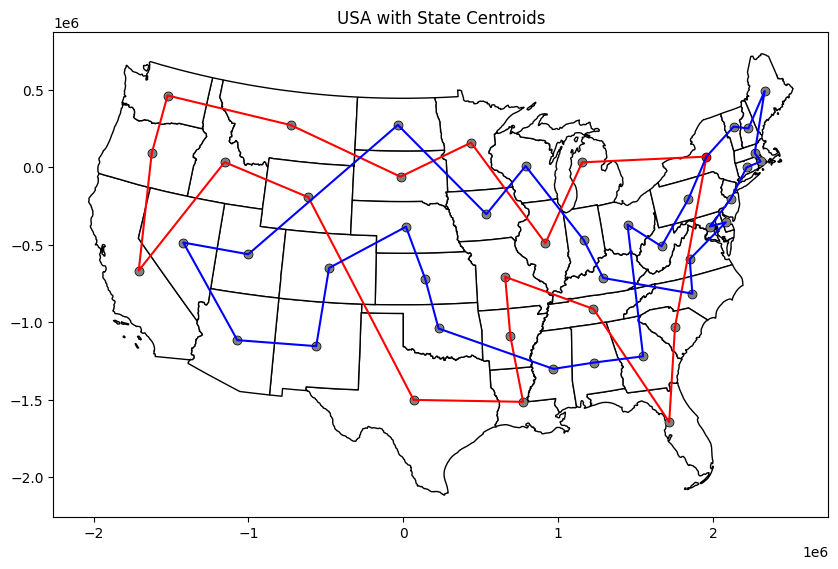

In [91]:
import geopandas as gpd

def get_state_centroids():

    # load pickled data from states.pkl if it exists
    try:
        states = pd.read_pickle('states.pkl')
        print('Loaded from states.pkl')
    except:
        states = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip')

        # pickle (save) the data to states.pkl so we don't need to download in the future
        states.to_pickle('states.pkl')

        print('Downloaded data and saved to states.pkl')

    # Filter out Alaska, Hawaii, and territories
    contiguous_usa = states[~states['STUSPS'].isin(['AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS', 'DC'])]

    # Get centroid data
    contiguous_usa = contiguous_usa.to_crs(epsg=2163)
    centroids = contiguous_usa.geometry.centroid
    contiguous_usa['centroid_lon'] = centroids.x
    contiguous_usa['centroid_lat'] = centroids.y

    # Create tuples (state name, x-coordinate, y-coordinate)
    state_tuples = list(zip(contiguous_usa['NAME'], centroids.x, centroids.y))

    return contiguous_usa, state_tuples

def draw_contiguous_usa_map_with_centroids():
    contiguous_usa, state_tuples = get_state_centroids()

    print(state_tuples)
    print(len(state_tuples))

    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    contiguous_usa.plot(ax=ax, color='white', edgecolor='black')

    # Plot centroids
    for statename, x, y in state_tuples:
        color = 'red' if statename == 'New York' else 'grey'
        plt.plot(x, y, marker='o', color=color, markersize=5)

    plt.title("USA with State Centroids")

    # show tours on map
    show_us_states_tours(state_tuples, ax)

def show_us_states_tours(state_tuples, ax):
  """Shows the tours on the map."""

  # initialize coordinates lists
  x_coords = []
  y_coords = []

  # print states and indices
  print([(state_tuples[i][0], i) for i in range(len(state_tuples))])

  # build lists for tsp and tour_pair
  states = [i for i in range(48)]
  i = 0
  for statename, x, y in state_tuples:
    if statename == "New York":
      states[0], states[i] = states[i], states[0]
      states.insert(24, i)
    x_coords.append(x)
    y_coords.append(y)
    i += 1

  # create tsp
  pos = pd.DataFrame({"x" : x_coords, "y" : y_coords})
  dist = squareform(pdist(pos))
  tsp = {"pos": pos, "dist": dist}

  # create tour pair
  split_index = 24
  tour_pair = (states[:split_index], states[split_index:])

  # run simulated annealing
  best_tours, num_moves = simulated_annealing(tsp, tour_pair, fast_simulated_annealing_schedule, 0.0001, us_states=True)

  # show best tours on map
  show_2tsp(tsp, best_tours, ax=ax)

draw_contiguous_usa_map_with_centroids()



---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.
